Importing dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Data collection and anylisis

In [2]:
#loading dataset in pandas dataframe
customer_data=pd.read_csv('Mall_Customers.csv')

In [24]:
customer_data


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
customer_data.shape

(200, 5)

In [5]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
customer_data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Choosing annual income and spending score

In [7]:
X=customer_data.iloc[:,[3,4]].values

In [8]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

Choosing number of clusters

WCSS ->> Within clusters sum of squares

In [15]:
#Elbow method --> finding wcss value for different number of clusters

wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,n_init=10,init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

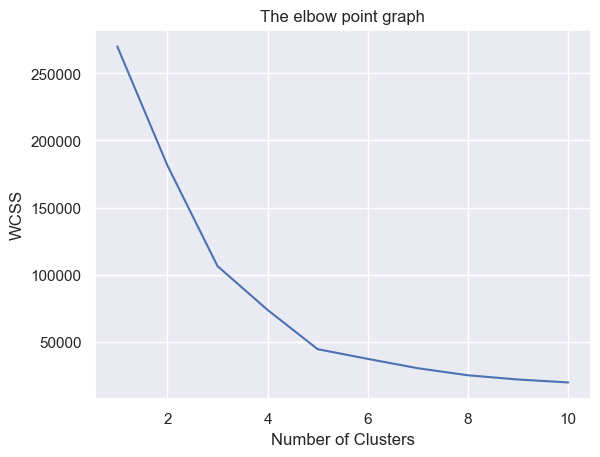

In [16]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The elbow point graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum number of clusters = 5

Training the KMeans Clustering model

In [21]:
kmeans=KMeans(n_clusters=5, n_init=10,init='k-means++',random_state=0)

#return a label on each data point based on their cluster
Y=kmeans.fit_predict(X)
print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


Visualizing all the clusters

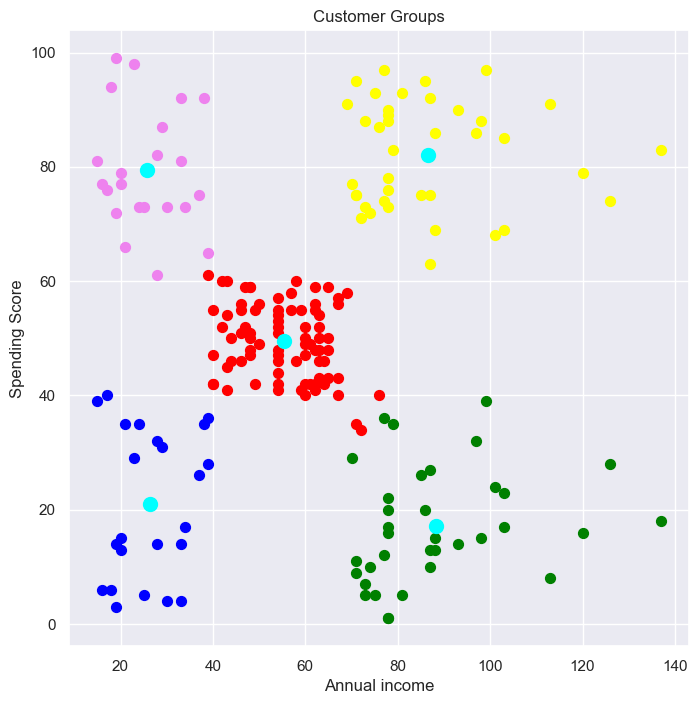

In [23]:
#Plotting all the clusters and their centoids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0],X[Y==0,1],s=50,c='green',label='Cluster 1')
plt.scatter(X[Y==1,0],X[Y==1,1],s=50,c='red',label='Cluster 2')
plt.scatter(X[Y==2,0],X[Y==2,1],s=50,c='yellow',label='Cluster 3')
plt.scatter(X[Y==3,0],X[Y==3,1],s=50,c='violet',label='Cluster 4')
plt.scatter(X[Y==4,0],X[Y==4,1],s=50,c='blue',label='Cluster 5')

#plot centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=100,c='cyan',label='Centroids')
plt.title('Customer Groups')
plt.xlabel('Annual income')
plt.ylabel('Spending Score')
plt.show()

